In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/4sight/vr3d.npy
/kaggle/input/4sight/img1.png
/kaggle/input/4sight/img2.png
/kaggle/input/4sight/img3.png
/kaggle/input/4sight/headPose.jpg
/kaggle/input/4sight/vr2d.npy


In [2]:
data_2d = np.load('/kaggle/input/4sight/vr2d.npy')
data_3d = np.load('/kaggle/input/4sight/vr3d.npy')
print('2D Shape: {}'.format(data_2d.shape))
print('3D Shape: {}'.format(data_3d.shape))
data_2d = data_2d.reshape(20,2)
data_3d = data_3d.reshape(20,3)

image_2_data2d = np.array([[1128.,536.],
                          [1128.,536.],
                          [1076.,533.],
                          [1076.,533.],
                          [369.,545.],
                          [369.,545.],
                          [584.,642.],
                          [584.,642.],
                          [1213.,8.],
                          [1100.,667.],
                          [1100.,667.],
                          [909.,92.],
                          [764.,406.],
                          [764.,406.],
                          [946.,311.],
                          [946.,311.],
                          [1133.,238.],
                          [736.,622.],
                          [736.,622.],
                          [826.,623.]])

image_3_data2d = np.array([[1173.,560.],
                          [1173.,560.],
                          [1115.,563.],
                          [1115.,563.],
                          [10.,558.],
                          [10.,558.],
                          [331.,676.],
                          [331.,676.],
                          [1221.,1.],
                          [1134.,757.],
                          [1134.,757.],
                          [780.,1.],
                          [567.,386.],
                          [567.,386.],
                          [878.,274.],
                          [878.,274.],
                          [1131.,178.],
                          [531.,645.],
                          [531.,645.],
                          [940.,612.]])

2D Shape: (20, 1, 2)
3D Shape: (20, 1, 3)


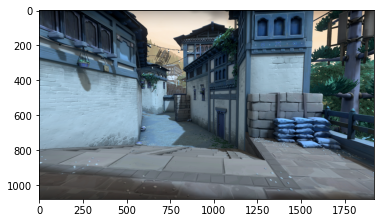

In [3]:
import cv2
import matplotlib.pyplot as plt
image_1 = cv2.imread('/kaggle/input/4sight/img1.png',cv2.IMREAD_COLOR)
image_2 = cv2.imread('/kaggle/input/4sight/img2.png',cv2.IMREAD_COLOR)
image_3 = cv2.imread('/kaggle/input/4sight/img3.png',cv2.IMREAD_COLOR)
plt.imshow(image_1)

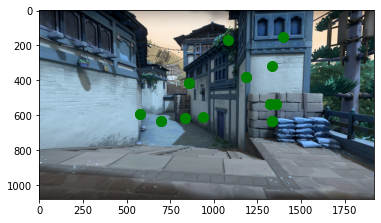

In [4]:
plt.imshow(image_1)
for x,y in data_2d:
    plt.plot(x, y, "og", markersize=10) 
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "og" (-> color='g'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


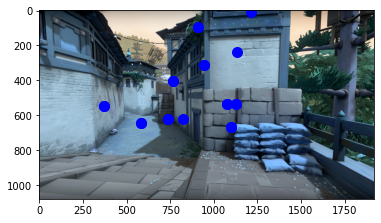

In [5]:
plt.imshow(image_2)
for x,y in image_2_data2d:
    plt.plot(x, y, "og", markersize=10,c='blue') 
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "og" (-> color='g'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


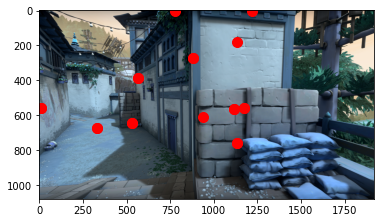

In [6]:
plt.imshow(image_3)
for x,y in image_3_data2d:
    plt.plot(x, y, "og", markersize=10,c='red') 
plt.show()

In [7]:
size = image_1.shape
focal_length = 100
dist_coeffs = np.zeros((4,1))
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
print("Camera Matrix :\n {0}".format(camera_matrix))

Camera Matrix :
 [[100.   0. 960.]
 [  0. 100. 540.]
 [  0.   0.   1.]]


In [8]:
(success, rotation_vector, translation_vector) = cv2.solvePnP(data_3d, data_2d, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)
print('SUCCESFULL=={}'.format(success))
print("Rotation Vector:\n {0}".format(rotation_vector))
print("Translation Vector:\n {0}".format(translation_vector))

SUCCESFULL==True
Rotation Vector:
 [[ 0.69558253]
 [-0.77041262]
 [ 1.44205164]]
Translation Vector:
 [[-3.98517651]
 [ 0.5479341 ]
 [-2.03955831]]


In [9]:
(success, rotation_vector_2, translation_vector_2) = cv2.solvePnP(data_3d, image_2_data2d, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)
print('SUCCESFULL=={}'.format(success))
print("Rotation Vector:\n {0}".format(rotation_vector_2))
print("Translation Vector:\n {0}".format(translation_vector_2))

SUCCESFULL==True
Rotation Vector:
 [[ 1.72623155]
 [-2.07226321]
 [ 1.0683697 ]]
Translation Vector:
 [[-8.8041232 ]
 [ 3.39470338]
 [ 0.76350924]]


In [10]:
(success, rotation_vector_3, translation_vector_3) = cv2.solvePnP(data_3d, image_3_data2d, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)
print('SUCCESFULL=={}'.format(success))
print("Rotation Vector:\n {0}".format(rotation_vector_3))
print("Translation Vector:\n {0}".format(translation_vector_3))

SUCCESFULL==True
Rotation Vector:
 [[ 1.85518685]
 [-2.06050889]
 [ 1.09926935]]
Translation Vector:
 [[-9.67051339]
 [ 3.75708209]
 [ 0.33703404]]


In [11]:
trans2_1 = translation_vector_2-translation_vector
trans3_1 = translation_vector_3-translation_vector
rotat2_1 = rotation_vector_2-rotation_vector
rotat3_1 = rotation_vector_3-rotation_vector
trans1 = np.array([0,0,0])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  array = np.array(array, copy=False, subok=subok)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes

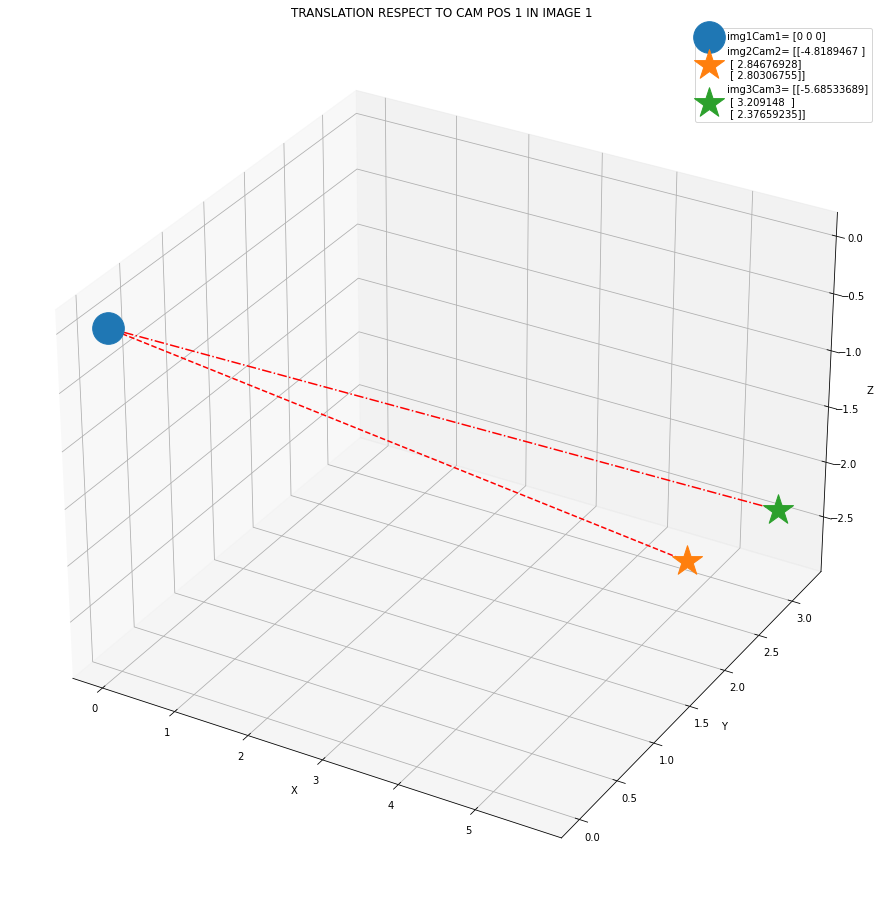

In [12]:
### from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
  
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = '3d')
ax.set_title('TRANSLATION RESPECT TO CAM POS 1 IN IMAGE 1')
# Data for a three-dimensional line
i1 = ax.scatter(trans1[0],trans1[1],trans1[2], 'green',s=1000)
i2 = ax.scatter(-trans2_1[0],trans2_1[1],-trans2_1[2], 'blue',s=1000,marker='*')
i3 = ax.scatter(-trans3_1[0],trans3_1[1],-trans3_1[2], 'red',s=1000,marker='*')
ax.plot([-trans2_1[0],trans1[0]], [trans2_1[1],trans1[1]], [-trans2_1[2],trans1[2]],'--', color='red')
ax.plot([-trans3_1[0],trans1[0]], [trans3_1[1],trans1[1]], [-trans3_1[2],trans1[2]],'-.', color='red')
#ax.plot([-trans3_1[0],-trans2_1[0]], [trans3_1[1],trans2_1[1]], [-trans3_1[2],-trans2_1[2]],'-.', color='red')
ax.legend((i1,i2,i3),('img1Cam1= {}'.format(trans1),'img2Cam2= {}'.format(trans2_1),'img3Cam3= {}'.format(trans3_1)))
#label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.view_init(60, 0)
plt.show()

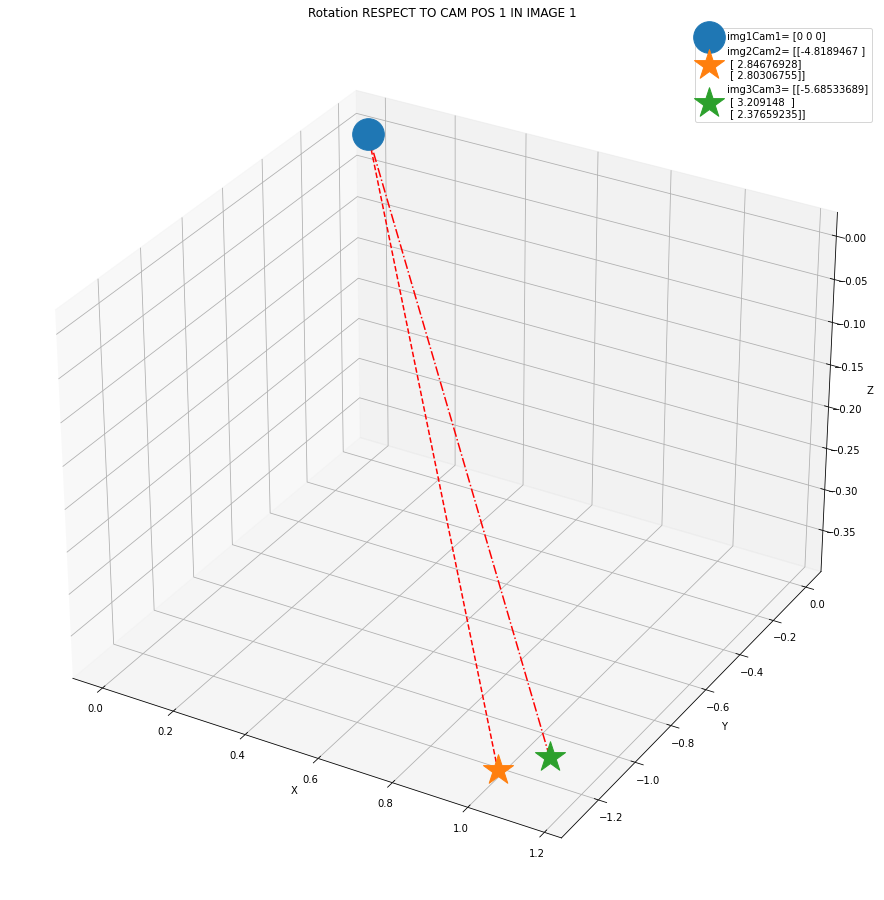

In [13]:
### from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
rotat1 = np.array([0,0,0])

fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = '3d')
ax.set_title('Rotation RESPECT TO CAM POS 1 IN IMAGE 1')
# Data for a three-dimensional line
i1 = ax.scatter(rotat1[0],rotat1[1],rotat1[2], 'green',s=1000)
i2 = ax.scatter(rotat2_1[0],rotat2_1[1],rotat2_1[2], 'blue',s=1000,marker='*')
i3 = ax.scatter(rotat3_1[0],rotat3_1[1],rotat3_1[2], 'red',s=1000,marker='*')
ax.plot([rotat2_1[0],rotat1[0]], [rotat2_1[1],rotat1[1]], [rotat2_1[2],rotat1[2]],'--', color='red')
ax.plot([rotat3_1[0],rotat1[0]], [rotat3_1[1],rotat1[1]], [rotat3_1[2],rotat1[2]],'-.', color='red')
#ax.plot([-trans3_1[0],-trans2_1[0]], [trans3_1[1],trans2_1[1]], [-trans3_1[2],-trans2_1[2]],'-.', color='red')
ax.legend((i1,i2,i3),('img1Cam1= {}'.format(trans1),'img2Cam2= {}'.format(trans2_1),'img3Cam3= {}'.format(trans3_1)))
#label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.view_init(60, 0)
plt.show()